## 作業

In [228]:
import pandas
article = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/finance_article.xlsx')

In [229]:
article.head()

,url,title,content,tag
0,https://www.ptt.cc/bbs/Loan/M.1586506724.A.914...,[問題] 新北原屋貸款,[抵押房屋資訊]\n地點：新北市永和\n房屋形態：透天五樓\n房屋種類：自有住宅\n房屋/土...,Loan
1,https://www.ptt.cc/bbs/Loan/M.1586449508.A.618...,信貸 (台積電),1. 信貸金額：80-200萬\n2. 還款期限：7年\n3. 貸款用途：投資理財\n4. ...,Loan
2,https://www.ptt.cc/bbs/Stock/M.1586573726.A.DB...,[新聞] 瑞幸咖啡遭遇做空 疫情危機下中概股受到的放大鏡式狙擊,1.原文連結：\n\n2.原文內容：\n林祖偉／BBC中文\n\n瑞幸咖啡有超過4500間分...,Stock
3,https://www.ptt.cc/bbs/Stock/M.1586582519.A.AE...,[新聞] 14檔業績四升 法人搶,1.原文連結：\n\n2.原文內容：14檔業績四升 法人搶\n2020-04-11 00:1...,Stock
4,https://www.ptt.cc/bbs/Stock/M.1586572758.A.8B...,[新聞] 突變酵素 塑膠瓶幾小時內能回收,1.原文連結：\n\n2.原文內容：\n科學家創造出一種突變細菌酵素，能在幾小時分解塑膠瓶進...,Stock


In [230]:
import jieba
corpus = []
titles = []
for idx, rec in article.iterrows():
  corpus.append(' '.join(jieba.cut(rec.get('content'))))
  titles.append(rec.get('title'))

In [231]:
corpus[0]

'[ 抵押 房屋 資訊 ] \n 地點 ： 新北市 永和 \n 房屋 形態 ： 透天 五樓 \n 房屋 種類 ： 自有 住宅 \n 房屋 / 土地 所有人 ： 母親 \n 坪數 ： 45 - 50 \n [ 需求 資訊 ] \n 欲 貸金額 :   500 - 1000 萬 \n 欲貸 年期 ： 20 / 30 年 \n 欲求 利率 ： 降息 後 的 行情 ， 理財型 希望 在 1.9% 以下 ， 一般 型 1.5% 以下 ( 目前 可 做 1.58% ) \n 貸款 用途 ： 投資理 財消費 \n 希望 還款 條件 ： 優先 徵求 長 年期 理財型 房貸 利率 \n [ 貸款 人 資訊 ] \n 年齡 ： 33 \n 職業 ： 金融 業務 \n 年收入 ： 100 萬 ， 本業加 其他 收入 \n 年資 ： 5 年 \n 信用卡 ： 匯豐 、 富邦 、 台新 \n 麻煩 來 信 提供 以下 內容 ： \n 1 . 銀行 及 方案 \n 2 . 總費用 ： 包含 開辦費 、 設定費 、 手續費 等等 相關 費用 ） \n 3 . 利率 方式 \n 4 . 綁 約 時間 / 提前 償 還規定 及 利率'

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [233]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(tfidf)

In [234]:
cs.shape

(300, 300)

In [235]:
m = (cs < 0.7).astype(int)

In [236]:
import networkx as nx
G = nx.from_numpy_matrix(m)
G

In [237]:
from community import community_louvain
article_cluster = community_louvain.best_partition(G)

In [238]:
from collections import Counter
c = Counter(article_cluster.values())
c.most_common(3)

[(1, 50), (0, 32), (15, 6)]

In [239]:
import numpy as np
np_titles = np.array(titles)


In [240]:
for cluster, cnt in c.most_common(3):
  for a in np_titles[np.array(list(article_cluster.values())) == cluster]:
    print(a)
  print('=====================================')

信貸 (台積電)
[問題] 個人信貸
[問題] 信用貸款
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信用貸款
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題]  個人首次信貸
[問題] 個人信貸
[請益] 小額貸款
[問題] 個人信貸
個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信用貸款
[問題] 補習班主任 信貸
[問題] 首次個人信貸
[問題] 醫師信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 桃園信貸 公職
[問題]
[問題] 個人信貸
[問題] 信用貸款
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
新北信貸
[問題] 信用貸款
[問題] 金融同業信貸
個人信貸
[問題] 匯豐個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 請提供個人信貸，利率2.4以下
[問題] 個人信貸
[問題] 金融同業貸款
[問題] 個人信貸
[問題] 個人信貸
[問題] 新北原屋貸款
[問題] 竹北房貸(首購)
[問題] 台南 房屋抵押貸款
[問題] 彰化公教首購房貸
[問題] 台中新光重劃區房屋轉貸
[問題] 竹東房貸(首購)
[問題] 房屋轉貸（新北）
[問題] 南投公教首購房貸
[問題] 房屋貸款（三峽北大特區）
[問題] 竹北房貸轉貸
[問題] 台南市 外籍人士房貸
[問題] 房貸新北
[問題] 北市醫師自住房貸
[問題] 淡水紅樹林首購貸款
[問題] 台北房屋增貸
[問題] 台中潭子首購房貸
[問題] 新竹 金雅房貸(首購）
[問題] 新竹 首購房貸
[問題] 竹北房貸 第二房
[問題] 房屋抵押貸款(桃園)
[問題] 板橋房子 （首購）
[問題] 個人信貸
[問題] 房屋抵押貸款(嘉義)(醫師)
[問題] 房屋轉增貸(台北市)
[問題] 竹北房貸轉貸
[問題] 竹北縣1縣2區首購
[問題] 台中市西區房屋轉貸/增貸
[問題] 職軍房貸成數
[問題] 桃園首購房貸
[問題] 台南房貸轉貸
[問題] 房屋抵押貸款
[問題] 新北首購房貸
[心得] 台新GOGO卡 小白核卡
[心得] 元大鑽金卡&渣打現金回饋 核

In [241]:
tfidf[np.array(list(article_cluster.values())) == 0,:]

<32x9613 sparse matrix of type '<class 'numpy.float64'>'
	with 2682 stored elements in Compressed Sparse Row format>

In [242]:
m2 = tfidf[np.array(list(article_cluster.values())) == 0,:].sum(axis = 0)

In [243]:
a2 = np.squeeze(np.asarray(m2))

In [244]:
words = np.array(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [245]:
a2.argsort()[::-1][0:10]

array([8264, 4162, 8301, 2475, 9419, 8910, 4654, 8272, 4927, 3390])

In [246]:
words[a2.argsort()[::-1][0:10]]

array(['貸款', '希望', '資訊', '利率', '預計', '還款', '房屋', '費用', '提供', '地點'],
      dtype='<U24')

In [247]:
for cluster, cnt in c.most_common(3):
  print('第{}群'.format(cluster))
  print('=====================================')
  m2 = tfidf[np.array(list(article_cluster.values())) == cluster,:].sum(axis = 0)
  a2 = np.squeeze(np.asarray(m2))
  print('相關關鍵字')
  print(words[a2.argsort()[::-1][0:10]])
  print('=====================================')
  for a in np_titles[np.array(list(article_cluster.values())) == cluster]:
    print(a)
  
  print('=====================================')

第1群
相關關鍵字
['貸款' '期限' '以下' '費用' '還款' '相關' '提前' '利率' '清償' '手續費']
信貸 (台積電)
[問題] 個人信貸
[問題] 信用貸款
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信用貸款
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題]  個人首次信貸
[問題] 個人信貸
[請益] 小額貸款
[問題] 個人信貸
個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信用貸款
[問題] 補習班主任 信貸
[問題] 首次個人信貸
[問題] 醫師信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 桃園信貸 公職
[問題]
[問題] 個人信貸
[問題] 信用貸款
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
新北信貸
[問題] 信用貸款
[問題] 金融同業信貸
個人信貸
[問題] 匯豐個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 個人信貸
[問題] 請提供個人信貸，利率2.4以下
[問題] 個人信貸
[問題] 金融同業貸款
[問題] 個人信貸
[問題] 個人信貸
第0群
相關關鍵字
['貸款' '希望' '資訊' '利率' '預計' '還款' '房屋' '費用' '提供' '地點']
[問題] 新北原屋貸款
[問題] 竹北房貸(首購)
[問題] 台南 房屋抵押貸款
[問題] 彰化公教首購房貸
[問題] 台中新光重劃區房屋轉貸
[問題] 竹東房貸(首購)
[問題] 房屋轉貸（新北）
[問題] 南投公教首購房貸
[問題] 房屋貸款（三峽北大特區）
[問題] 竹北房貸轉貸
[問題] 台南市 外籍人士房貸
[問題] 房貸新北
[問題] 北市醫師自住房貸
[問題] 淡水紅樹林首購貸款
[問題] 台北房屋增貸
[問題] 台中潭子首購房貸
[問題] 新竹 金雅房貸(首購）
[問題] 新竹 首購房貸
[問題] 竹北房貸 第二房
[問題] 房屋抵押貸款(桃園)
[問題] 板橋房子 （首購）
[問題] 個人信貸
[問題] 房屋抵押貸款(嘉義)(醫師)
[問題] 房屋轉增貸(台北市)
[問題] 竹北房貸轉貸
[問題] 

### Practice

In [248]:
tfidf[np.array(list(article_cluster.values())) == 0, :]

<32x9613 sparse matrix of type '<class 'numpy.float64'>'
	with 2682 stored elements in Compressed Sparse Row format>

In [249]:
m2 = tfidf[np.array(list(article_cluster.values())) == 0, :].sum(axis = 0)

In [250]:
a2 = np.squeeze(np.asarray(m2))
print(a2)

[0. 0. 0. ... 0. 0. 0.]


In [251]:
words = np.array(vectorizer.get_feature_names())
a2.argsort()[::-1][0:10]

array([8264, 4162, 8301, 2475, 9419, 8910, 4654, 8272, 4927, 3390])

In [252]:
words[a2.argsort()[::-1][0:10]]

array(['貸款', '希望', '資訊', '利率', '預計', '還款', '房屋', '費用', '提供', '地點'],
      dtype='<U24')

## 決策樹

In [253]:
from sklearn.datasets import load_iris
iris = load_iris()

In [254]:
iris.data[0:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [255]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [256]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [257]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [258]:
from sklearn import tree
tree.export_graphviz(clf, 'tree.dot')

In [259]:
! cat tree.dot

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = 

In [260]:
X = iris.data
y = iris.target

In [261]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [262]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2)

In [263]:
predicted_y = clf.predict(test_X)

In [264]:
(predicted_y == test_y).sum() / len(test_y)

0.9666666666666667

In [265]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predicted_y)

0.9666666666666667

In [266]:
tree.export_graphviz(clf, 'tree2.dot')

In [267]:
! cat tree2.dot

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]"] ;
1 [label="gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]"] ;
2 -> 3 ;
4 [label="gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]"] ;
2 -> 4 ;
}

In [268]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
y = iris.target
X = iris.data[:, [2, 3]]

clf = tree.DecisionTreeClassifier(max_depth=2, random_state = 42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

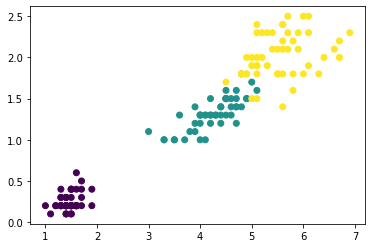

In [269]:
from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1)

In [270]:
import numpy as np
a = np.array([[1,1]])
clf.predict(a)

array([0])

In [271]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))




In [272]:
xx

array([[0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       ...,
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8]])

In [273]:
yy

array([[-0.9, -0.9, -0.9, ..., -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, ..., -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, ..., -0.7, -0.7, -0.7],
       ...,
       [ 3.2,  3.2,  3.2, ...,  3.2,  3.2,  3.2],
       [ 3.3,  3.3,  3.3, ...,  3.3,  3.3,  3.3],
       [ 3.4,  3.4,  3.4, ...,  3.4,  3.4,  3.4]])

In [274]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0. , -0.9],
       [ 0.1, -0.9],
       [ 0.2, -0.9],
       ...,
       [ 7.6,  3.4],
       [ 7.7,  3.4],
       [ 7.8,  3.4]])

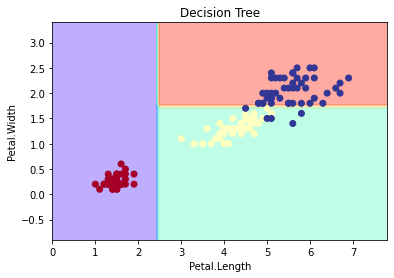

In [275]:
plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

In [276]:
tree.export_graphviz(clf, 'tree3.dot')

In [277]:
! cat tree3.dot

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}

### Practice

In [278]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data.shape
iris.target.shape

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
clf.predict(iris.data)

from sklearn import tree
tree.export_graphviz(clf, 'tree.dot')

In [279]:
! cat tree.dot

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [

In [280]:
X = iris.data
y = iris.target


from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train_X, train_y)

predicted_y = clf.predict(test_X)
accuracy = (predicted_y == test_y).sum() / len(test_y)
accuracy

tree.export_graphviz(clf, 'tree2.dot')

In [281]:
! cat tree2.dot

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]"] ;
1 [label="gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]"] ;
2 -> 3 ;
4 [label="gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]"] ;
2 -> 4 ;
}

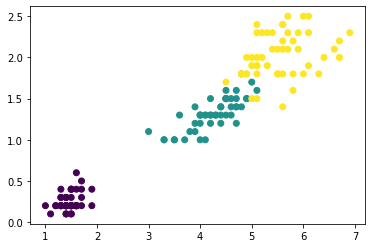

In [282]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf.fit(X, y)

from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, alpha = 1)

In [283]:
import numpy as np
a = np.array([[1,1]])
clf.predict(a)

array([0])

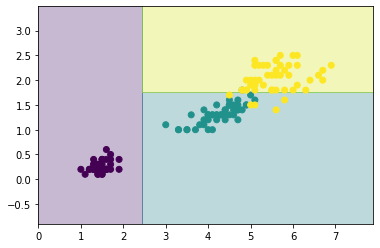

In [284]:
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

x_range = np.arange(x_min, x_max, 0.01)
y_range = np.arange(y_min, y_max, 0.01)

x_coordinate, y_coordinate = np.meshgrid(x_range, y_range)
# print(x_coordinate)
# print(y_coordinate)
m = np.stack((x_coordinate.flatten(), y_coordinate.flatten()), axis = 1)
z_coordinate = clf.predict(m).reshape(x_coordinate.shape)
# print(y_coordinate)

from matplotlib import pyplot as plt
plt.contourf(x_coordinate, y_coordinate, z_coordinate, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, alpha = 1)


In [285]:
tree.export_graphviz(clf, 'tree3.dot')

In [286]:
! cat tree3.dot

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}

## 邏輯迴歸分析

In [287]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 1000)
clf.fit(iris.data, iris.target)

LogisticRegression(max_iter=1000)

In [288]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [289]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
clf = LogisticRegression(random_state = 42)
clf.fit(X, y)

LogisticRegression(random_state=42)

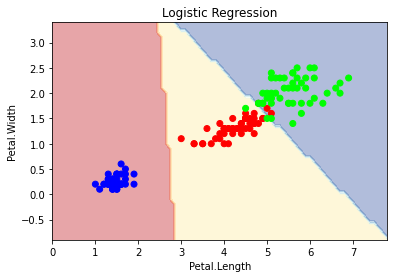

In [290]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

###Practice

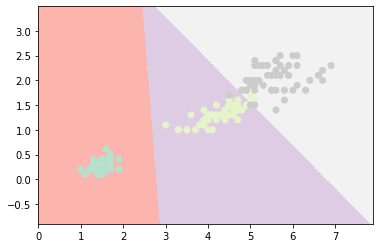

In [332]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 1000)
clf.fit(iris.data, iris.target)
clf.predict(iris.data)

X = iris.data[:,2]
Y = iris.data[:,3]
# plt.scatter(X,Y,c=iris.target)

clf = LogisticRegression(max_iter = 1000)
clf.fit(np.stack((X,Y), axis=1), iris.target)
# print(clf.predict([[1,1]]))

x_min, x_max, y_min, y_max = X.min()-1, X.max()+1, Y.min()-1, Y.max()+1
x_range = np.arange(x_min, x_max, 0.005)
y_range = np.arange(y_min, y_max, 0.005)

x_coordinate, y_coordinate = np.meshgrid(x_range, y_range)
# print(x_coordinate)
# print(y_coordinate)
m = np.stack((x_coordinate.flatten(), y_coordinate.flatten()), axis = 1)
# print(clf.predict(m))

plt.contourf(x_coordinate, y_coordinate, clf.predict(m).reshape(x_coordinate.shape), cmap='Pastel1')
plt.scatter(X,Y,c=iris.target, cmap="Pastel2")


## 新聞分類

In [292]:
import pandas
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/news.xlsx', index_col = 0)

In [293]:
df.head()

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」
3,生活,【廣編特輯】 對於全能神教會在中國所遭受的迫害與在韓國、香港及臺灣所面對的反面宣傳，非政府組...,https://tw.news.appledaily.com/life/realtime/2...,【特企】NGO聯名譴責中共迫害宗教信仰
4,生活,立法院交通委員會今審查《道路交通管理處罰條例》，通過營業大客車駕駛人行駛一般道路未繫安全帶，...,https://tw.news.appledaily.com/life/realtime/2...,乘客搭大客車不配合繫安全帶 立院初審通過可罰6千元


In [294]:
import jieba
corpus = []
titles = []
tags  = []

for idx, rec in df[df['category'].isin(['娛樂','社會'])].iterrows():
  corpus.append(' '.join(jieba.cut(rec.get('content'))))
  titles.append(rec.get('title'))
  tags.append(rec.get('category'))

In [295]:
len(corpus)

247

In [296]:
from collections import Counter
c = Counter(tags)
c

Counter({'社會': 146, '娛樂': 101})

In [297]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [298]:
tfidf

<247x13883 sparse matrix of type '<class 'numpy.float64'>'
	with 32161 stored elements in Compressed Sparse Row format>

In [299]:
X = tfidf
y = tags

In [300]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y, train_titles, test_titles = train_test_split(X, y, titles, test_size = 0.2, random_state = 42)

In [301]:
train_X.shape

(197, 13883)

In [302]:
test_X.shape

(50, 13883)

In [303]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01)

In [304]:
pred_y = clf.predict(test_X)

In [305]:
(pred_y == test_y).sum() / len(pred_y)

1.0

In [306]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

1.0

In [307]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
confusion_matrix(test_y, pred_y)

['娛樂' '社會']


array([[22,  0],
       [ 0, 28]])

In [308]:
# 留存  流失
#[[900, 100
#  100, 100]]

500 * 24 * 100

1200000

In [309]:
2000 * 100

200000

In [310]:
import jieba
corpus = []
titles = []
tags  = []

for idx, rec in df[df['category'].isin(['娛樂','社會', '政治'])].iterrows():
  corpus.append(' '.join(jieba.cut(rec.get('content'))))
  titles.append(rec.get('title'))
  tags.append(rec.get('category'))

In [311]:
from collections import Counter
c = Counter(tags)
c

Counter({'政治': 84, '社會': 146, '娛樂': 101})

In [312]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [313]:
X = tfidf
y = tags

In [314]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y, train_titles, test_titles = train_test_split(X, y, titles, test_size = 0.2, random_state = 42)

In [315]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01)

In [316]:
pred_y = clf.predict(test_X)

In [317]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

0.9552238805970149

In [318]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
confusion_matrix(test_y, pred_y)

['娛樂' '政治' '社會']


array([[23,  1,  0],
       [ 0, 18,  0],
       [ 1,  1, 23]])

In [319]:
np_titles = np.array(test_titles)

In [320]:
test_y != pred_y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [321]:
np_titles[test_y != pred_y]

array(['《殺人回憶》懸案上銀幕\u3000領宋康昊登影帝寶座', '蘇花坍方搶修進行順利\u3000延長通行時段紓解交通',
       '小心！在美結婚台灣沒登記\u3000偷腥照樣能捉姦'], dtype='<U36')

In [322]:
np_test_y = np.array(test_y)
np_test_y[test_y != pred_y]

array(['娛樂', '社會', '社會'], dtype='<U2')

In [323]:
pred_y[test_y != pred_y]

array(['政治', '政治', '娛樂'], dtype='<U2')

In [324]:
news = """
今上午罷韓四君子包括罷韓連署領銜人陳冠榮、Wecare高雄發言人尹立、公民割草行動發言人李佾潔及台灣基進黨新聞輿情部主任張博洋，在6月6日罷韓投票結束後首度合體現身，高呼「罷韓成果、投票堅守」。尹立特別指出，原對補選並未發表太多意見，是昨看到韓市府前團隊現身幫李眉蓁助選，連韓國瑜都盛傳選前之夜要現身，他們必須站出來捍衛罷韓後所彰顯的民主價值。

陳冠榮說，世界政經局勢過去兩年急遽變化，但高雄重心放錯只是在鋪路、清水溝及爬樹，罷韓投票光復高雄是把不珍惜、不重視高雄未來的市長手上主權，從他身上拿回來還給人民，過去韓粉狹整個高市府威嚇高雄市民，高雄在政治流氓操弄下一無是處，沒想到中國國民黨未記取韓國瑜教訓，一樣推出草包候選人，韓粉更想「借體還魂附身在李眉蓁身上，試圖重拾他們過去的光榮。」

他說今天罷韓四君子再次合體就是要呼籲高雄市民勇敢站出來，行使自己主權，用自己理智、腦袋與眼睛去檢視所有候選人的言行，讓高雄選出一個更正確的市長，迎頭趕上過去兩年失落的腳步。

尹力則坦言今又站出來感慨很深，韓市府團隊各局處當時種種打壓罷免投票行動歷歷在目，「結果昨天他們還有臉站出來，六月六日被超過93萬高雄市民否定的團隊竟然又回來了，真的是把高雄人當塑膠，還是當成紙紮的？」

尹立強調，看到韓前團隊過去荒腔走板，選前之夜韓國瑜又要出來幫李眉蓁站台，「這些作為真的是不斷打臉高雄人，過去批高雄又老又窮、摩天輪、挖石油，結果李眉蓁提蘭姆酒、海水沖馬桶等政見，不只是把高雄人當成又老又窮，是把我們當成蠢的是不是？」

對李眉蓁近日所提政見，尹立直批，「提這種事沒有任何概念、論述、策略與方法，高雄人就是這樣給你侮辱嗎？」他呼籲所有高雄人，8月15日是大家歷經千辛萬苦爭取來的，「要珍惜手上的選票，珍惜這個機會，必須讓唬爛團隊、不重視高雄的團隊徹底離開高雄。」

李佾潔則說，原期待國民黨能提出更符合高雄市民需求與未來發展的候選人，「結果李眉蓁100%完美承襲韓前市長草包風格，就好像一個學生96%抄襲，連操行都不及格還要選他當班長嗎？」

李佾潔重批李眉蓁就是這樣的一個零分的候選人，結果還找了零分的局處首長來助選，這就是藐視、忽視高雄人的鐵證，把高雄人當笨蛋，市民若感到生氣不滿，8月15日一定要站出來投票支持陳其邁，出來投票讓國民黨得到真正的教訓，不要再讓零分團隊回來丟高雄人的臉。

張博洋則嘲諷罷韓投票後曾說歡迎韓市長以公民身分回高雄玩，「沒想到前市府團隊玩到記者會上，韓市長還可能玩到造勢晚會，這樣子的玩就玩得太超過了！」他說罷韓四君子會一再為對抗韓國瑜站出來，也呼籲市民也要為高雄再勇敢一次。

張博洋更指出，從只喊得出愛情摩天輪、賽車、賽馬的韓前市長、提出蘭姆酒、海水沖馬桶政見的李眉蓁，到能夠為這一切背書中國國民黨中央、高市議會黨團，「國民黨如今只能用一句話形容，就是結構性的草包、結構性的卡高雄！」呼籲每位市民出來投票，不用因自己的心軟、善意成為國民黨吃定高雄人最好的理由。

記者會後罷韓四君子以招牌的四人合體雙手交叉姿態，高喊「罷韓成果、投票堅守」，呼籲高雄市民8月15日當天一定要出來投票，捍衛罷韓投票所彰顯的民主價值，隨後陳冠榮和張博洋則站上宣傳車在市區掃街，訴求「罷韓成果不辜負、光榮投票來守護！」
"""

In [325]:
news_seg = ' '.join(jieba.cut(news))

In [326]:
news_vec = vectorizer.transform([news_seg])

In [327]:
news_vec

<1x18689 sparse matrix of type '<class 'numpy.float64'>'
	with 178 stored elements in Compressed Sparse Row format>

In [328]:
clf.predict(news_vec)

array(['政治'], dtype='<U2')

###Practice

In [349]:
import pandas as pd

df = pd.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/news.xlsx', index_col = 0)

In [362]:
import jieba as jb
corpus = []
for idx, item in df.iterrows():
  corpus.append(" ".join([w for w in jb.lcut(item.get('content')) if len(w) >= 2]))

In [ ]:
titles = []
for idx, item in df.iterrows():
  titles.append(item.get('title'))
print(titles)

In [ ]:
tags = []
for idx, item in df.iterrows():
  tags.append(item.get('category'))
print(tags)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vec = vectorizer.fit_transform(corpus)

In [412]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X = vectorizer.transform(corpus)
Y = tags

train_x, test_x, train_y, test_y, train_titles, test_titles = train_test_split(X, Y, titles, test_size=0.2, random_state = 42)

In [413]:
clf = MultinomialNB(alpha=0.01)
clf.fit(train_x, train_y)

MultinomialNB(alpha=0.01)

In [414]:
predict_y = clf.predict(test_x)

accuracy = (predict_y == test_y).sum()/len(predict_y)
print(accuracy)


0.8055555555555556


In [415]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predict_y)

0.8055555555555556

In [416]:
from sklearn.metrics import confusion_matrix
# print(clf.classes_)
confusion_matrix(test_y, predict_y)

array([[ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  0, 23,  0,  2,  0,  0,  3,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0, 16,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  2, 16,  0,  3,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  1, 32,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  7,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1,  1,  0,  1, 21,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 10]])

In [417]:
np_titles = np.array(test_titles)
np_titles[test_y != predict_y]

array(['日本數位音響先鋒\u3000CD之父中島平太郎病逝', '【霸氣貼背】「這是我們的夢幻車款」！Kia新車北美試駕超給力',
       '三中案馬英九圖利中時老闆？\u3000北檢：不評論', '奧斯卡名導再爆性侵案\u3000拍10歲女童裸照遭警方調查',
       '好重要！喝優酪乳助排便\u3000專家：但救不了便祕', '蘇花坍方搶修進行順利\u3000延長通行時段紓解交通',
       'Google美國熱搜排行榜\u3000林書豪髮型最熱門', '癲癇者爭取考駕上路！月底開會\u3000醫：不敢保證不會發作',
       '借國寶給外國辦展未獲回饋？故宮：目的是推介故宮', '560%容積爭議\u3000威京：只是拿回應有的',
       '遠銀資安漏洞\u3000顧立雄：不改善處分不只這樣', 'FENDI蕾絲裝透酥胸\u3000長澤雅美3億珠寶閃爆',
       '淘汰「高污染」老車\u3000搭公共運輸擬補助', 'friDay影音攜手ELEVEN體育家族\u3000直播多元賽事',
       '玉熊爬上台北101\u3000林曉同珠寶浪漫極了', '雲林縣長選舉沒有更好的人選嗎？',
       '律師不甘「鑽狗洞」推倒總統安檢門\u3000法官判有理', '維密超模、網紅搶獻吻\u3000施華洛世奇「熊」吸睛',
       '【測撞片】美國IIHS公布15款最安全車\u300010款國內有售',
       '【恐怖片】為拿手機衝回火場\u3000工人變「火人」重傷', '【暖心片】袋熊媽被撞死\u3000母屍拉出倖存寶寶',
       '古剎住持私奔女尼生兒女\u3000更扯！他還是殺人逃犯', '【壹週刊】百億貸款將到期\u3000柯P放容積解套京華城',
       '10公里免費！台灣代駕APP供企業3萬人體驗', '【慶富案】曾銘宗爆金管會被施壓\u3000碰到花媽就失靈',
       '證交所宣導資安\u3000「DDoS防駭遊戲王」桌遊免費送', '人妻外遇先殺老公\u3000再毀容小王調包丈夫',
       '女歌手爆乳灑奶吃香蕉\u3000被批意淫遭判關2年', '余光中不適住院\u3000校方：老師人很好請放心',
       '體協個人會員申請20日截止\u

In [418]:
np_test_y = np.array(test_y)
np_test_y[test_y != predict_y]

array(['國際', '國際', '社會', '娛樂', '生活', '社會', '國際', '生活', '生活', '財經地產',
       '財經地產', '娛樂', '生活', '財經地產', '娛樂', '論壇', '社會', '娛樂', '副刊', '國際',
       '國際', '國際', '壹週刊', '生活', '財經地產', '財經地產', '國際', '國際', '生活', '體育',
       '社會', '3C', '3C', '生活', '國際'], dtype='<U4')

In [419]:
predict_y[test_y != predict_y]

array(['財經地產', '副刊', '政治', '國際', '論壇', '生活', '3C', '政治', '娛樂', '生活', '論壇',
       '3C', '政治', '體育', '財經地產', '政治', '政治', '3C', '3C', '社會', '副刊', '社會',
       '生活', '財經地產', '政治', '3C', '社會', '娛樂', '論壇', '生活', '論壇', '財經地產',
       '娛樂', '論壇', '娛樂'], dtype='<U4')

In [428]:
predict_news = """台灣民眾黨新竹市長侯選人、立委高虹安遭質疑詐領立法院助理費，高虹安今天傳出因行程中身體不適，醫師診斷後安排注射點滴和進一步檢查，並留院休養。高虹安下午在臉書po出打點滴照片並報平安表示，「虹安一切平安，正在休養生息，這兩天減少行程數量，放慢腳步好好吃好好睡，補充體力再出發。」"""

In [429]:
predict_corpus = []
predict_corpus.append(" ".join([w for w in jb.lcut(predict_news) if len(w)>=2]))
predict_vec = vectorizer.transform(predict_corpus)
clf.predict(predict_vec)

array(['生活'], dtype='<U4')